In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import sklearn.discriminant_analysis as skl_da
from IPython.core.pylabtools import figsize
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.neighbors as skl_nb
import matplotlib.pyplot as plt
from numpy import argmax
from numpy import array
import pandas as pd
import numpy as np
import sklearn
import pickle


In [ ]:
update requirement.txt 

include the C(RB) plot see david article
include the F1 score

# Part 1

In [2]:
df = pd.read_pickle('C:/Users/amaca253/Desktop/Friends-Friends-Language-Analysis/BBT/data_300pca.pkl')


In [3]:
from scipy.spatial.distance import euclidean
import matplotlib.patches as mpatches
from sklearn.cluster import KMeans
import seaborn as sns
from textwrap import wrap

def Sort(sub_li):
    sub_li.sort(key = lambda x: x[1], reverse = False)
    return sub_li

### Cluster and average position - For the plot

In [ ]:
num_clusters = 10
X = df.loc[:,'PCA1':'PCA2']

kmeans = KMeans(
    n_clusters=num_clusters, 
    init='k-means++', 
    max_iter=100, 
    n_init=50)


label = kmeans.fit_predict(X)
df['Cluster']= label
df2 = X.values

closest_pt_idx = []
for iclust in range(kmeans.n_clusters):
    # get all points assigned to each cluster:
    cluster_pts = df2[kmeans.labels_ == iclust]
    # get all indices of points assigned to this cluster:
    cluster_pts_indices = np.where(kmeans.labels_ == iclust)[0]
    cluster_cen = kmeans.cluster_centers_[iclust]
    min_idx = np.argmin([euclidean(df2[idx], cluster_cen) for idx in cluster_pts_indices])
    closest_pt_idx.append(cluster_pts_indices[min_idx])

In [ ]:
centroids = kmeans.cluster_centers_

centroid_list = []
for i in np.arange(len(centroids)):
    liste= [i, centroids[i,0], centroids[i,1]]
    centroid_list.append(liste)


centroid_list = Sort(centroid_list)


u_labels = np.unique(label)
text = [df['Said'][closest_pt_idx[i]] for i in range(num_clusters)]
text2 = [ '\n'.join(wrap(l, 40)) for l in text]


colors = sns.color_palette('tab20', 10)
ind_col_map = {x:y for x, y in zip(df['Cluster'].unique(),colors)}
ind_col_map = dict(sorted(ind_col_map.items()))

key_order = [i[0] for i in centroid_list]


fig = plt.figure(figsize= (13,9))
ax = fig.add_subplot(111)


for i in u_labels:
    ax.scatter(df2[label == i , 0] , df2[label == i , 1] ,color=ind_col_map[i],  label = i, alpha= 0.25)
ax.scatter(centroids[:,0] , centroids[:,1] , s = 20, color = 'k')
#legend_list = []
#for key in ind_col_map.keys():
#    legend_list.append(mpatches.Patch(color=ind_col_map[key],label=text2[key]))
legend_list = []
for key in key_order:
    legend_list.append(mpatches.Patch(color=ind_col_map[key],label=text2[key]))
    


ax.legend(title='Average phrase',bbox_to_anchor=(1.02, 1),handles=legend_list, loc='upper left',borderaxespad=0, fontsize=12, title_fontsize=14)

x_text = 'PCA1: Short phrase to long phrase that include \"Sheldon \"' #for pca1
plt.text(-5, -12.5, x_text, ha='left', wrap=True,fontsize=14)
an1 = plt.annotate('+', xy=(0.04, -0.1), xycoords='axes fraction', xytext=(1, -0.1), arrowprops=dict(arrowstyle="<-", color='lightgray'))
an2 = plt.annotate('-', xy=(-0.02, -0.1), xycoords=an1, fontsize=15)

y_text = 'PCA2: Long phrase about a female character to short phrase about \"Sheldon\" ' # for pca2
plt.text(-13.5, -10, y_text, rotation = 90 , wrap=True,fontsize=14)
an3 = plt.annotate('+', xy=(-0.045, -0.02), xycoords='axes fraction', xytext=(-0.045, 1), arrowprops=dict(arrowstyle="<-", color='lightgray'))
an4 = plt.annotate('-', xy=(-0.045, -0.05), xycoords=an3, fontsize=15)


plt.savefig('PCA1_2.png',bbox_inches='tight')
plt.show()

In [ ]:
check the the PCA interpretation 
add "PCA number" 

In [ ]:
sheldon =df[df['Person'].str.contains('Sheldon')]
sheldon_mean_pca1_index = sheldon['PCA1'].mean()
sheldon_mean_pca2_index = sheldon['PCA2'].mean()

leonard =df[df['Person'].str.contains('Leonard')]
leonard_mean_pca1_index = leonard['PCA1'].mean()
leonard_mean_pca2_index = leonard['PCA2'].mean()

penny =df[df['Person'].str.contains('Penny')]
penny_mean_pca1_index = penny['PCA1'].mean()
penny_mean_pca2_index = penny['PCA2'].mean()

howard =df[df['Person'].str.contains('Howard')]
howard_mean_pca1_index = howard['PCA1'].mean()
howard_mean_pca2_index = howard['PCA2'].mean()

raj =df[df['Person'].str.contains('Raj')]
raj_mean_pca1_index = raj['PCA1'].mean()
raj_mean_pca2_index = raj['PCA2'].mean()

bernadette =df[df['Person'].str.contains('Bernadette')]
bernadette_mean_pca1_index = bernadette['PCA1'].mean()
bernadette_mean_pca2_index = bernadette['PCA2'].mean()

amy =df[df['Person'].str.contains('Amy')]
amy_mean_pca1_index = amy['PCA1'].mean()
amy_mean_pca2_index = amy['PCA2'].mean()

text = [df['Said'][closest_pt_idx[i]] for i in range(num_clusters)]
text2 = [ '\n'.join(wrap(l, 40)) for l in text]

colors = sns.color_palette('tab20', 10)
ind_col_map = {x:y for x, y in zip(df['Cluster'].unique(),colors)}
ind_col_map = dict(sorted(ind_col_map.items()))

key_order = [i[0] for i in centroid_list]

df2 = X.values

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)

for i in u_labels:
    ax.scatter(df2[label == i , 0] , df2[label == i , 1] ,color=ind_col_map[i],  label = i, alpha= 0.25)






legend_list = []
for key in key_order:
    legend_list.append(mpatches.Patch(color=ind_col_map[key],label=text2[key]))

ax.legend(title='Average phrase',bbox_to_anchor=(1.02, 1),handles=legend_list, loc='upper left',borderaxespad=0, fontsize=11, title_fontsize=13)


plt.annotate('Sheldon', (sheldon_mean_pca1_index,sheldon_mean_pca2_index), xytext=(10,-10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"), fontsize=15)

plt.annotate('Leonard', (leonard_mean_pca1_index, leonard_mean_pca2_index), xytext=(10,10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"),fontsize=15)

plt.annotate('Penny', (penny_mean_pca1_index, penny_mean_pca2_index), xytext=(10,10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"),fontsize=15)

plt.annotate('Howard', (howard_mean_pca1_index ,howard_mean_pca2_index ), xytext=(-70,2),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"),fontsize=15)

plt.annotate('Raj', (raj_mean_pca1_index,raj_mean_pca2_index), xytext=(10,9),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"),fontsize=15)

plt.annotate('Bernadette', (bernadette_mean_pca1_index, bernadette_mean_pca2_index), xytext=(10,11),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"),fontsize=15)

plt.annotate('Amy', (amy_mean_pca1_index, amy_mean_pca2_index),xytext=(10,10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"),fontsize=15)

plt.xlim(-2,3)
plt.ylim(-1,1.5) 

plt.title('Average position for each character')

x_text = 'Short phrase to long phrase that include \"Sheldon \"' #for pca1
plt.text(-0.5, -1.25, x_text, ha='left', wrap=True,fontsize=13)

y_text = 'Long phrase about a female character to short phrase about \"Sheldon\" ' # for pca2
plt.text(-2.25, -0.75, y_text, rotation = 90 , wrap=True,fontsize=13)

plt.savefig('average position.png',bbox_inches='tight')

plt.show()

In [ ]:
num_clusters = 10
X = df.loc[:,'PCA3':'PCA4']

kmeans = KMeans(
    n_clusters=num_clusters, 
    init='k-means++', 
    max_iter=100, 
    n_init=50)


label = kmeans.fit_predict(X)
df['Cluster']= label
df2 = X.values

closest_pt_idx = []
for iclust in range(kmeans.n_clusters):
    # get all points assigned to each cluster:
    cluster_pts = df2[kmeans.labels_ == iclust]
    # get all indices of points assigned to this cluster:
    cluster_pts_indices = np.where(kmeans.labels_ == iclust)[0]
    cluster_cen = kmeans.cluster_centers_[iclust]
    min_idx = np.argmin([euclidean(df2[idx], cluster_cen) for idx in cluster_pts_indices])
    closest_pt_idx.append(cluster_pts_indices[min_idx])

In [ ]:
centroids = kmeans.cluster_centers_

centroid_list = []
for i in np.arange(len(centroids)):
    liste= [i, centroids[i,0], centroids[i,1]]
    centroid_list.append(liste)


centroid_list = Sort(centroid_list)


u_labels = np.unique(label)
text = [df['Said'][closest_pt_idx[i]] for i in range(num_clusters)]
text2 = [ '\n'.join(wrap(l, 40)) for l in text]


colors = sns.color_palette('tab20', 10)
ind_col_map = {x:y for x, y in zip(df['Cluster'].unique(),colors)}
ind_col_map = dict(sorted(ind_col_map.items()))

key_order = [i[0] for i in centroid_list]


fig = plt.figure(figsize= (13,9))
ax = fig.add_subplot(111)


for i in u_labels:
    ax.scatter(df2[label == i , 0] , df2[label == i , 1] ,color=ind_col_map[i],  label = i, alpha= 0.25)
ax.scatter(centroids[:,0] , centroids[:,1] , s = 20, color = 'k')

legend_list = []
for key in key_order:
    legend_list.append(mpatches.Patch(color=ind_col_map[key],label=text2[key]))
    


ax.legend(title='Average phrase',bbox_to_anchor=(1.02, 1),handles=legend_list, loc='upper left',borderaxespad=0, fontsize=12, title_fontsize=14)

x_text = 'PCA3: Phrase that question a premise to phrase with a first person futur action'
plt.text(-8, -13, x_text, ha='left', wrap=True,fontsize=14)
an1 = plt.annotate('+', xy=(0.02, -0.08), xycoords='axes fraction', xytext=(1, -0.08), arrowprops=dict(arrowstyle="<-", color='lightgray'))
an2 = plt.annotate('-', xy=(-0.02, -0.08), xycoords=an1, fontsize=15)

y_text = 'PCA4: Phrase about relashionship to phrase related to food'
plt.text(-11.5, -8, y_text, rotation = 90 , wrap=True,fontsize=14)
an3 = plt.annotate('+', xy=(-0.06, -0.02), xycoords='axes fraction', xytext=(-0.06, 1), arrowprops=dict(arrowstyle="<-", color='lightgray'))
an4 = plt.annotate('-', xy=(-0.06, -0.04), xycoords=an3, fontsize=15)

plt.savefig('PCA3_4.png',bbox_inches='tight')
plt.show()








In [ ]:
num_clusters = 10
X = df.loc[:,'PCA5':'PCA6']

kmeans = KMeans(
    n_clusters=num_clusters, 
    init='k-means++', 
    max_iter=100, 
    n_init=50)


label = kmeans.fit_predict(X)
df['Cluster']= label
df2 = X.values

closest_pt_idx = []
for iclust in range(kmeans.n_clusters):
    # get all points assigned to each cluster:
    cluster_pts = df2[kmeans.labels_ == iclust]
    # get all indices of points assigned to this cluster:
    cluster_pts_indices = np.where(kmeans.labels_ == iclust)[0]
    cluster_cen = kmeans.cluster_centers_[iclust]
    min_idx = np.argmin([euclidean(df2[idx], cluster_cen) for idx in cluster_pts_indices])
    closest_pt_idx.append(cluster_pts_indices[min_idx])

In [ ]:
centroids = kmeans.cluster_centers_

centroid_list = []
for i in np.arange(len(centroids)):
    liste= [i, centroids[i,0], centroids[i,1]]
    centroid_list.append(liste)


centroid_list = Sort(centroid_list)


u_labels = np.unique(label)
text = [df['Said'][closest_pt_idx[i]] for i in range(num_clusters)]
text2 = [ '\n'.join(wrap(l, 40)) for l in text]


colors = sns.color_palette('tab20', 10)
ind_col_map = {x:y for x, y in zip(df['Cluster'].unique(),colors)}
ind_col_map = dict(sorted(ind_col_map.items()))

key_order = [i[0] for i in centroid_list]


fig = plt.figure(figsize= (13,9))
ax = fig.add_subplot(111)


for i in u_labels:
    ax.scatter(df2[label == i , 0] , df2[label == i , 1] ,color=ind_col_map[i],  label = i, alpha= 0.25)
ax.scatter(centroids[:,0] , centroids[:,1] , s = 20, color = 'k')
#legend_list = []
#for key in ind_col_map.keys():
#    legend_list.append(mpatches.Patch(color=ind_col_map[key],label=text2[key]))
legend_list = []
for key in key_order:
    legend_list.append(mpatches.Patch(color=ind_col_map[key],label=text2[key]))
    


ax.legend(title='Average phrase',bbox_to_anchor=(1.02, 1),handles=legend_list, loc='upper left',borderaxespad=0, fontsize=12, title_fontsize=14)
x_text = 'PCA5: Discussion with often a negation to short question about a woman'
plt.text(-6, -12, x_text, ha='left', wrap=True,fontsize=14)
an1 = plt.annotate('+', xy=(0.02, -0.08), xycoords='axes fraction', xytext=(1, -0.08), arrowprops=dict(arrowstyle="<-", color='lightgray'))
an2 = plt.annotate('-', xy=(-0.02, -0.08), xycoords=an1, fontsize=15)

y_text = 'PCA6: Phrase with an apology to phrase with affirmative statement '
plt.text(-12, -9, y_text, rotation = 90 , wrap=True,fontsize=14)
an3 = plt.annotate('+', xy=(-0.06, -0.02), xycoords='axes fraction', xytext=(-0.06, 1), arrowprops=dict(arrowstyle="<-", color='lightgray'))
an4 = plt.annotate('-', xy=(-0.06, -0.04), xycoords=an3, fontsize=15)


plt.savefig('PCA5_6.png',bbox_inches='tight')
plt.show()

### Creation dataset 

In [ ]:
# Sheldon : 11484
# Leonard : 9638
Sheldon =  df.loc[df['Person']== 'Sheldon']
Leonard = df.loc[df['Person']== 'Leonard']
df = pd.concat([Sheldon, Leonard], ignore_index=True)
#df= df.groupby('Person').apply(lambda x: x.sample(n=9638)).reset_index(drop = True) ## ONLY IF WE WANT A BALANCED DATASET
print(df.pivot_table(index = ['Person'], aggfunc ='size'))

# Logistic regression

In [4]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

data = df['Person']
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print('integer_encoded: ',integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['Sheldon' 'Leonard' 'Sheldon' ... 'Sheldon' 'Sheldon' 'Sheldon']
integer_encoded:  [6 3 6 ... 6 6 6]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
['Sheldon']


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [52]:
X = df.loc[:,'PCA1':'PCA300']



y = integer_encoded
y = np.squeeze(y)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state = 0)
y_train, y_test =  np.squeeze(y_train),  np.squeeze(y_test)


stand = X.std(axis=0)
mean_col = X.mean(axis=0)
X = X.values

for pca in range(len(X[0,:])):
    for row in range(len(X[:,0])):
        X[row,pca] = (X[row,pca]-mean_col[pca])/stand[pca]

y = integer_encoded
y = np.squeeze(y)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state = 0)
y_train, y_test =  np.squeeze(y_train),  np.squeeze(y_test)

[6 3 6 ... 6 6 6]
[6 3 6 ... 6 6 6]


In [6]:
model = skl_lm.LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
print('Model summary:')
print(model)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print('Misclassification rate:', 100*np.sum(y_pred != y_test)/y_test.shape[0], "%")

# Confusion matrix
print("Confusion matrix:\n")
print(pd.crosstab(y_pred, y_test, rownames=['Actual'], colnames=['Predicted']), '\n')

# Accuracy
print(f"Accuracy: {np.mean(y_pred == y_test):.3f}")
print('accuracy_score', accuracy_score(y_pred, y_test))

# Model score
print('model score',model.score(X_train, y_train))


# Roc AUC SCORE
# If not multiclass
#print(roc_auc_score(y_test, model.predict_proba(X_test)))
#print(roc_auc_score(y_test, model.decision_function(X_test)))
#print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


# If multiclass
#print(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))



Model summary:
LogisticRegression()
0.3369137367402762
Misclassification rate: 66.30862632597238 %
Confusion matrix:

Predicted    0    1    2     3    4    5     6
Actual                                        
0           43   18   25    29   21   12    36
1           16   58   18    30   29   24    13
2           61   86  205   197  126  125   164
3          370  323  640  1328  793  442   731
4          177  155  324   615  841  223   346
5           23   22   56    58   58  107    75
6          446  205  670   961  621  575  2468 

Accuracy: 0.337
accuracy_score 0.3369137367402762
model score 0.362344464089135


##### Binary case

In [17]:
from sklearn.metrics import PrecisionRecallDisplay
import sklearn.preprocessing


y_score = model.decision_function(X_test)

display = PrecisionRecallDisplay.from_predictions(y_test, y_score, name="LinearSVC", plot_chance_level=True)
fig = display.ax_.set_title("2-class Precision-Recall curve")
plt.savefig('precision_recall_unbalanced_sheldonLeonard.png')

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


ValueError: The target y is not binary. Got multilabel-indicator type of target.

##### MultiClass

In [21]:
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
import sklearn.preprocessing

label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(y_test)+1))
y_test2 = label_binarizer.transform(y_test)
y_score = model.decision_function(X_test)
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(6):
    precision[i], recall[i], _ = precision_recall_curve(y_test2[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test2[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test2.ravel(), y_score.ravel()
)
average_precision["micro"] = average_precision_score(y_test2, y_score, average="micro")

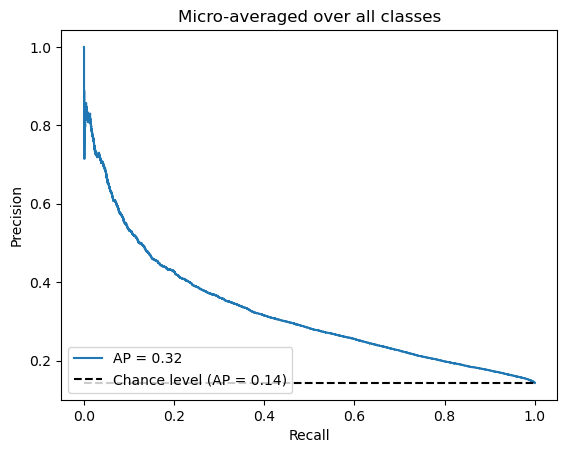

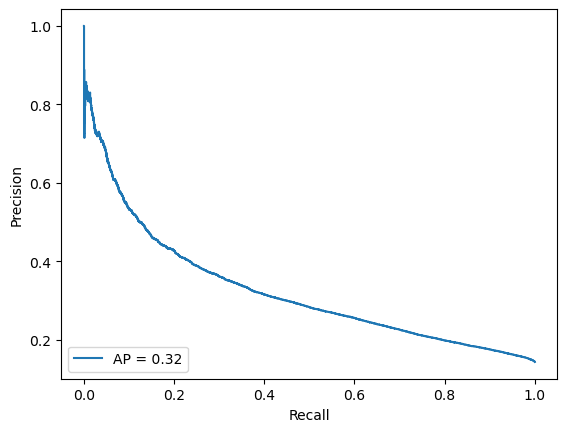

In [46]:
from collections import Counter
import matplotlib.pyplot as plt

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
    prevalence_pos_label=Counter(y_test.ravel())[1] / y_test.size,
)
display.plot(plot_chance_level=True)
_= display.ax_.set_title("Micro-averaged over all classes")

display.plot()


#### ROC AUC SCORE

In [ ]:
def logistic_function(dataset, number_pca):
    pca = 'PCA'+str(i)
    X = df.loc[:,'PCA1':pca]
    X = scaled(X)
    y = integer_encoded
    y = np.squeeze(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state = 0)
    y_train, y_test =  np.squeeze(y_train),  np.squeeze(y_test)

    model = LogisticRegression(random_state=0).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #roc_return = roc_auc_score(y_test, model.decision_function(X_test), multi_class='ovr')
    roc_return = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovo')
    return roc_return

def scaled(X):
    stand = X.std(axis=0)
    min_col = X.min(axis=0)
    X = X.values
    min_col = X.min(axis=1)
    for pca in range(len(X[0,:])):
        for row in range(len(X[:,0])):
            X[row,pca] = (X[row,pca]-min_col[pca])/stand[pca]
    return X

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
roc = []
for i in range(2,301,1):
    print('process until PCA',i)
    roc.append(logistic_function(df, i))
    print('done')


In [ ]:
x = np.arange(2,301)
y =  np.asarray(roc)
plt.figure()
plt.plot(x,y)
plt.xlabel('Number of PCA')
plt.ylabel('AUC')
plt.savefig('roc_300pca_ovo.png')
plt.show()

#### F1 Score

In [53]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='micro')

0.3369137367402762

# Part 2

### PCA Table

In [ ]:
coef = model.coef_

liste = []
for i in range(0,300):
    coef_temp = np.squeeze(coef[:,i])
    sub_list = [i+1, coef_temp.item(), abs(coef_temp.item())]
    liste.append(sub_list)
    
# Python code to sort the tuples using second element 
# of sublist Inplace way to sort using sort()
def Sort(sub_li):
    sub_li.sort(key = lambda x: x[2], reverse = True)
    return sub_li

new_list = Sort(liste)
for i in range(20):
    print('PCA',new_list[i][0])

In [ ]:
import itertools
# Creation of the binome
personnes = ['Amy','Penny','Bernadette','Sheldon', 'Leonard', 'Raj', 'Howard']
# personnes = ['Rachel', 'Ross', 'Joey', 'Monica', 'Phoebe', 'Chandler']
couples = list(itertools.combinations(personnes, 2))

for couple in couples:
    print(couple)

In [ ]:
pca_df = pd.read_pickle('C:/Users/amaca253/Desktop/Friends-Friends-Language-Analysis/BBT/data_300pca.pkl')

In [ ]:
# logistic regression

def create_dataset(dataset, perso1, perso2):
    character1 =  dataset.loc[dataset['Person']== perso1]
    character2 =  dataset.loc[dataset['Person']== perso2]
    #num1 = character1.shape[0] #number of sentences of C1
    #num2 = character2.shape[0] #number of sentences of C1
    #minimum = min(num1,num2)
    df = pd.concat([character1, character2], ignore_index=True)
    #df= df.groupby('Person').apply(lambda x: x.sample(n=minimum)).reset_index(drop = True)
    return df

# to sort a list
def Sort(sub_li):
    sub_li.sort(key = lambda x: x[2], reverse = True)
    return sub_li

coef_matrix = np.zeros((len(couples),300))
model_intercept = np.zeros(len(couples))
i=0
for couple in couples:
    print(str(couple[0]), str(couple[1]))
    df = create_dataset(pca_df, str(couple[0]), str(couple[1]))

    data = df['Person']
    values = array(data)
    # integer encode
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    y = integer_encoded
    y = np.squeeze(y)
    
    X = df.loc[:,'PCA1':'PCA300']
    stand = X.std(axis=0)
    mean_col = X.mean(axis=0)
    X = X.values

    for pca in range(len(X[0,:])):
        for row in range(len(X[:,0])):
            X[row,pca] = (X[row,pca]-mean_col[pca])/stand[pca]
    




    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state = 0)
    y_train, y_test =  np.squeeze(y_train),  np.squeeze(y_test)

   # model = LogisticRegression(random_state=0).fit(X_train, y_train)
    model = LogisticRegression(solver='lbfgs').fit(X_train, y_train)

    coef = model.coef_
    coef_matrix[i]= coef
    intercept=model.intercept_
    model_intercept[i] = intercept[0]
    classes=model.classes_
    print('classes')
    print(classes)

    print(coef.shape)
    print(intercept)
    i+=1

In [ ]:
coef_matrix

In [ ]:
data=[]
for couple in couples:
    temp = str(couple[0])+ ' and ' +str(couple[1])
    data.append(temp)
column_names = [f'PCA{i}' for i in range(1, 301)]
df_matrix = pd.DataFrame(coef_matrix, columns=column_names)
df_matrix['Pairs'] = data
df_matrix.to_pickle('C:/Users/amaca253/Desktop/Friends-Friends-Language-Analysis/BBT/coef_matrix_TBBT_solverlbfgs_unbalance.pkl')

In [ ]:
df_matrix = pd.read_pickle('C:/Users/amaca253/Desktop/Friends-Friends-Language-Analysis/BBT/coef_matrix_TBBT_solverlbfgs_unbalance.pkl')
df_matrix = df_matrix.sort_values('PCA1',ignore_index=True)

In [ ]:
 '''Here we would like to create a dataset such that we read each row
 will take the absolute value of the values and save the 10st values in a 
 matrix, and the values of the te corresponding pca in a list'''
df_subset = df_matrix.loc[:, 'PCA1':'PCA300']
data = np.zeros((len(df_subset),10))
text=[]
for row in np.arange(len(df_matrix)):
    selected_row = np.abs(df_subset.iloc[row])
    top_10_columns = selected_row.nlargest(10)
    data[row] =df_subset.loc[row][top_10_columns.index]
    text.append(top_10_columns.index)

column_names = [f'Column{i}' for i in range(1, 11)]
df2 = pd.DataFrame(data, columns=column_names)
df2['Pairs']= df_matrix['Pairs']

# Here we want to sort the value of the 1st column
df2 = df2.sort_values('Column1',ignore_index=True)
data2 = df2.loc[:, 'Column1':'Column10']

In [ ]:
# Here we want to have the text value after the sorting 
def Sort(sub_li):
    sub_li.sort(key = lambda x: x[0], reverse = True)
    return sub_li

# we create a list that will take the 
data_list = []
for i in np.arange(len(data)):
    list_10 = []
    for j in np.arange(len(data[0,:])):
        list_temp = [data[i,j], text[i][j]]
        list_10.append(list_temp)
    data_list.append(list_10)
    

sort_list = Sort(data_list)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6)) 
cmap= sns.diverging_palette(220, 20, as_cmap=True)
heatmap = sns.heatmap(data2, yticklabels=df_matrix['Pairs'], xticklabels=[], linewidths=.5, ax=ax, cmap=cmap)

# Annotate each cell with the corresponding PCA label
for i in range(len(df_subset)):
    for j in range(10):
        cell_label = sort_list[i][j][1]
        ax.text(j + 0.5, i + 0.5, cell_label, ha='center', va='center', fontsize=8, color= 'white', fontweight = 'bold')
plt.savefig('heatmap_TBBT_abs_top10.png',bbox_inches='tight')

plt.show()

In [ ]:
# Here we count the number of PCA, in order to investigate the most important ones

def count_occurrences(text_list):
    # Create an empty dictionary to store counts
    counts = {}

    # Iterate through the list of text
    for item in text_list:
        # Check if the item is already in the dictionary
        if item in counts:
            # If yes, increment the count
            counts[item] += 1
        else:
            # If not, add the item to the dictionary with a count of 1
            counts[item] = 1

    # Return the dictionary with counts
    return counts

list_pca = []
for i in range(len(df_subset)):
    for j in range(10):
        list_pca.append(sort_list[i][j][1])

result = count_occurrences(list_pca)
result = dict(sorted(result.items(), key=lambda item: item[1],reverse=True))
# Print the result
for item, count in result.items():
    print(f"{item}: {count} occurrence(s)")
    
list_pca = ['PCA7','PCA19','PCA5','PCA2','PCA3','PCA15', 'PCA29','PCA1', \
            'PCA27','PCA17','PCA24','PCA10','PCA4','PCA12', 'PCA13','PCA18','PCA33','PCA37', 'PCA39']
for pca in list_pca:
    print('\subsection{',pca,'}')
    
    print('top values')
    print('\ begin{dialogue}')
    x=pca_df.nlargest(20,pca)
    for i in range(len(x)):
        print('\speak{',x.iloc[i]['Person'],'}',x.iloc[i]['Said'])
    print('\end{dialogue}')
    print()
    
    print('lowest values')
    print('\ begin{dialogue}')
    x= pca_df.nsmallest(20,pca)
    for i in range(len(x)):
        print('\speak{',x.iloc[i]['Person'],'}',x.iloc[i]['Said'])
    print('\end{dialogue}')
    print()
    print()

In [ ]:
df_matrix['PCA19']

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize an empty dictionary
coefficients = {}


for i in np.arange(len(couples)):
    coeff = df_matrix['PCA19'][i]
    # Assign the coefficient to the pair of classes in the dictionary
    coefficients[(couples[i][0], couples[i][1])] = coeff

print(coefficients)

# Create a graph
G = nx.Graph()

# Add edges with weights
for edge, weight in coefficients.items():
    G.add_edge(edge[0], edge[1], weight=weight)

# Draw the graph
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=12, font_weight="bold")

# Add edge labels
edge_labels = {(u, v): f"{w:.2f}" for (u, v, w) in G.edges(data='weight')}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the graph
plt.title("Relationship Between Classes")
plt.show()


In [ ]:

# Initialize an empty dictionary
coefficients = {}


for i in np.arange(len(couples)):
    coeff = df_matrix['PCA2'][i]
    # Assign the coefficient to the pair of classes in the dictionary
    coefficients[(couples[i][0], couples[i][1])] = coeff

print(coefficients)

# Create a graph
G = nx.Graph()

# Add edges with weights
for edge, weight in coefficients.items():
    G.add_edge(edge[0], edge[1], weight=weight)

# Draw the graph
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=12, font_weight="bold")

# Add edge labels
edge_labels = {(u, v): f"{w:.2f}" for (u, v, w) in G.edges(data='weight')}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the graph
plt.title("Relationship Between Classes")
plt.show()

In [ ]:

# Initialize an empty dictionary
coefficients = {}


for i in np.arange(len(couples)):
    coeff = df_matrix['PCA7'][i]
    # Assign the coefficient to the pair of classes in the dictionary
    coefficients[(couples[i][0], couples[i][1])] = coeff

print(coefficients)

# Create a graph
G = nx.Graph()

# Add edges with weights
for edge, weight in coefficients.items():
    G.add_edge(edge[0], edge[1], weight=weight)

# Draw the graph
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=12, font_weight="bold")

# Add edge labels
edge_labels = {(u, v): f"{w:.2f}" for (u, v, w) in G.edges(data='weight')}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the graph
plt.title("Relationship Between Classes")
plt.show()

In [ ]:

# Initialize an empty dictionary
coefficients = {}


for i in np.arange(len(couples)):
    coeff = df_matrix['PCA7'][i]
    # Assign the coefficient to the pair of classes in the dictionary
    coefficients[(couples[i][0], couples[i][1])] = coeff

print(coefficients)

# Create a graph
G = nx.Graph()

# Add edges with weights
for edge, weight in coefficients.items():
    G.add_edge(edge[0], edge[1], weight=weight)

# Draw the graph
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=12, font_weight="bold")

# Add edge labels
edge_labels = {(u, v): f"{w:.2f}" for (u, v, w) in G.edges(data='weight')}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the graph
plt.title("Relationship Between Classes")
plt.show()